In [86]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [87]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype= np.float64)
# plt.plot(xs,ys)
# plt.scatter(xs,ys)

In [88]:
# function that returns the best fit slope
def best_fit_slope_and_intercept(xs, ys):
    m= (( (mean(xs)*mean(ys)) - mean(xs*ys))/
          (mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m, b

[m,b] = best_fit_slope_and_intercept(xs,ys)
print(m, b)

0.42857142857142866 4.0


In [89]:
regression_line_points = [(m*x) + b for x in xs]
regression_line_points

[4.428571428571429,
 4.857142857142858,
 5.2857142857142865,
 5.714285714285714,
 6.142857142857143,
 6.571428571428572]

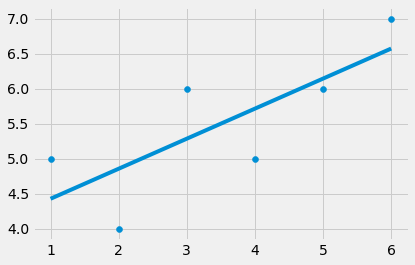

In [90]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line_points)
plt.grid()
plt.grid()

In [91]:
# determining accuracy: squared error. R^2 coefficient
# 1 - (mean sq error of our line / mean sq error of avg of points (linea piatta sulla media, orizzontale))

def sq_error(ys_orig, ys_fit_line):  
    return sum((ys_fit_line - ys_orig)**2)

def coeff_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_err_regr_line = sq_error(ys_orig, ys_line)
    sq_err_y_mean = sq_error(ys_orig, y_mean_line)
    return 1- (sq_err_regr_line/sq_err_y_mean)
    

In [92]:
r_squared = coeff_of_determination(ys, regression_line_points)
r_squared

0.5844155844155845

In [93]:
# R^2 would be zero if points were just fitted using mean value
# NOW lets test our model 

In [94]:
import random
def create_dataset(how_many, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(how_many):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]       
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

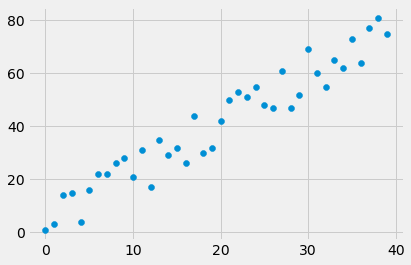

In [95]:
xs, ys = create_dataset(40, 10, 2, correlation='pos')
plt.scatter(xs, ys)

In [96]:
[m,b] = best_fit_slope_and_intercept(xs,ys)
print(m, b)
regression_line_points = [(m*x) + b for x in xs]

1.7897748592870542 5.974390243902441


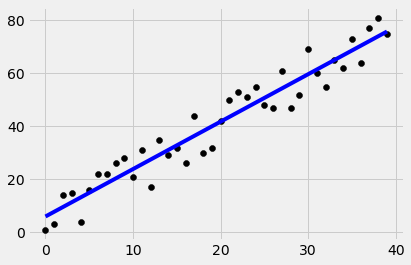

In [97]:
plt.scatter(xs, ys, color='black')
plt.plot(xs, regression_line_points, color='blue')

In [98]:
r_squared = coeff_of_determination(ys, regression_line_points)
r_squared

0.9249761839906739

In [99]:
# we can see that decreasing variance in data, the coeff of determination goes up! 